In [ ]:
# from zipfile import ZipFile

# with ZipFile("/content/drive/MyDrive/DATASETS/cric_shots.zip", 'r') as zObject:

#     zObject.extractall(
#         path="/content/drive/MyDrive/DATASETS/")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import PIL.Image as Image


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pathlib
data_dir = pathlib.Path('/content/drive/MyDrive/DATASETS/cric_data')
image_count = len(list(data_dir.glob('*/*.png')))
image_count

4586

In [4]:
cric_img_dict = {
    'drive' : list(data_dir.glob('drive/*.png')),
    'flick' : list(data_dir.glob('legglance-flick/*.png')),
    'pullshot' : list(data_dir.glob('pullshot/*.png')),
    'sweep' : list(data_dir.glob('sweep/*png'))
}

In [5]:
cric_label_dict = {
    'drive' : 0,
    'flick' : 1,
    'pullshot': 2,
    'sweep' : 3
}


In [6]:
import cv2
x = []
y = []

for shot_name , images in cric_img_dict.items():
  for img in images:
    img = cv2.imread(str(img))
    resized_img = cv2.resize(img,(224,224))
    x.append(resized_img)
    y.append(cric_label_dict[shot_name])

In [7]:
import numpy as np
x = np.array(x)
y = np.array(y)

In [8]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

In [22]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

from tensorflow.keras.layers import Dropout, BatchNormalization
import tensorflow_hub as hub
feature_extractor_layer = hub.KerasLayer(resnet_url,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=(224, 224, 3))


resnet_model = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(512,  activation="relu"),
    tf.keras.layers.Dense(256,  activation="relu"),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(128,  activation="relu"),
    tf.keras.layers.Dense(23, activation='softmax', name='output_layer')
  ])



In [9]:
# model = keras.Sequential()
# model.add(keras.layers.Conv2D(filters=250,kernel_size=3,activation="relu",input_shape=[224,224,3]))
# model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
# model.add(keras.layers.Conv2D(filters=300,kernel_size=3,activation='relu'))
# model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
# model.add(keras.layers.Conv2D(filters=350,kernel_size=3,activation='relu'))
# model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(1000,activation="relu"))
# # model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.Dense(1000,activation="relu"))
# # model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.Dense(800,activation="relu"))
# # model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.Dense(800,activation="relu"))
# # model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.Dense(4,activation="softmax"))


In [23]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               1049088   
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                      

In [24]:
resnet_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics="accuracy")

In [25]:
history = resnet_model.fit(x_train,y_train,epochs=20 )

Epoch 1/20
115/115 [==============================] - 18s 94ms/step - loss: 25.9492 - accuracy: 0.2702
Epoch 2/20
115/115 [==============================] - 10s 83ms/step - loss: 1.6111 - accuracy: 0.2696
Epoch 3/20
115/115 [==============================] - 10s 84ms/step - loss: 1.4873 - accuracy: 0.2601
Epoch 4/20
115/115 [==============================] - 10s 84ms/step - loss: 1.4843 - accuracy: 0.2838
Epoch 5/20
115/115 [==============================] - 10s 84ms/step - loss: 1.4754 - accuracy: 0.2770
Epoch 6/20
115/115 [==============================] - 10s 83ms/step - loss: 1.4516 - accuracy: 0.2863
Epoch 7/20
115/115 [==============================] - 10s 83ms/step - loss: 1.4504 - accuracy: 0.2988
Epoch 8/20
115/115 [==============================] - 10s 83ms/step - loss: 1.3985 - accuracy: 0.3214
Epoch 9/20
115/115 [==============================] - 10s 84ms/step - loss: 1.3758 - accuracy: 0.3282
Epoch 10/20
115/115 [==============================] - 10s 83ms/step - loss: 1.38

In [26]:
resnet_model.evaluate(x_test,y_test)

29/29 [==============================] - 4s 117ms/step - loss: 1.3889 - accuracy: 0.2495


[1.3889423608779907, 0.24945533275604248]

<Axes: >

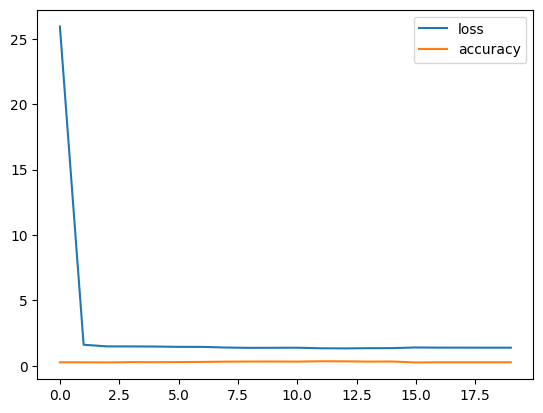

In [27]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [28]:
size = (224,224)
drive = Image.open("/content/drive/MyDrive/DATASETS/cric_test_data/images1.jpeg").resize(size)

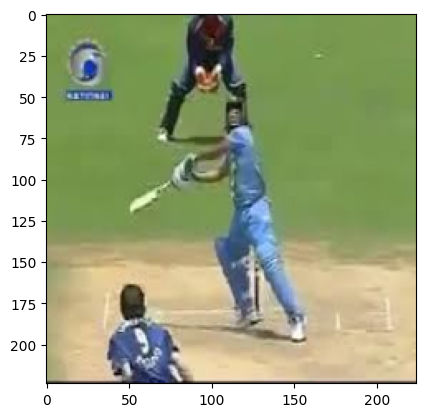

In [29]:
import matplotlib.pyplot as plt
plt.imshow(drive)

In [30]:
drive = np.array(drive)/255.
drive

array([[[0.4627451 , 0.58823529, 0.29411765],
        [0.4627451 , 0.58823529, 0.29411765],
        [0.4627451 , 0.58823529, 0.29411765],
        ...,
        [0.49019608, 0.61176471, 0.33333333],
        [0.49019608, 0.61176471, 0.3372549 ],
        [0.49019608, 0.61176471, 0.3372549 ]],

       [[0.47058824, 0.59607843, 0.30196078],
        [0.47058824, 0.59607843, 0.30196078],
        [0.47058824, 0.59607843, 0.30196078],
        ...,
        [0.49019608, 0.61176471, 0.33333333],
        [0.49019608, 0.61176471, 0.3372549 ],
        [0.49019608, 0.61176471, 0.3372549 ]],

       [[0.4745098 , 0.6       , 0.30588235],
        [0.4745098 , 0.6       , 0.30588235],
        [0.4745098 , 0.6       , 0.30588235],
        ...,
        [0.49019608, 0.61176471, 0.33333333],
        [0.49019608, 0.61176471, 0.3372549 ],
        [0.49019608, 0.61176471, 0.3372549 ]],

       ...,

       [[0.64705882, 0.65490196, 0.51372549],
        [0.65098039, 0.65882353, 0.51764706],
        [0.65882353, 0

In [31]:
result = resnet_model.predict(drive[np.newaxis,...])

1/1 [==============================] - 2s 2s/step


In [32]:
result

array([[2.8470528e-01, 2.1751177e-01, 2.4693926e-01, 2.4861719e-01,
        8.7381579e-07, 1.9192076e-04, 5.0262288e-06, 1.7300742e-06,
        7.8927849e-05, 5.7952282e-05, 2.9094015e-06, 2.7740403e-04,
        2.4191879e-05, 7.7406853e-04, 1.4579675e-05, 9.7803670e-05,
        8.9765614e-05, 3.0568921e-05, 8.5822736e-05, 2.0279216e-04,
        3.3259399e-05, 3.0608069e-05, 2.2625354e-04]], dtype=float32)

In [33]:
for i in cric_label_dict:
  if cric_label_dict[i] == np.argmax(result):
    print(i)

drive


In [35]:
resnet_model.save('/content/drive/MyDrive/DATASETS/model_cric/model_cric_shots.h5')